In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import glob
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter, find_peaks

In [2]:
font = {'size'   : 20}

matplotlib.rc('font', **font)

In [3]:
# R0 = 99.7 #Ohm

# colors = ['tab:red', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue', 'tab:purple', 'tab:pink', 'tab:brown']
colors = ['black', 'tab:red', 'tab:orange', 'tab:green']

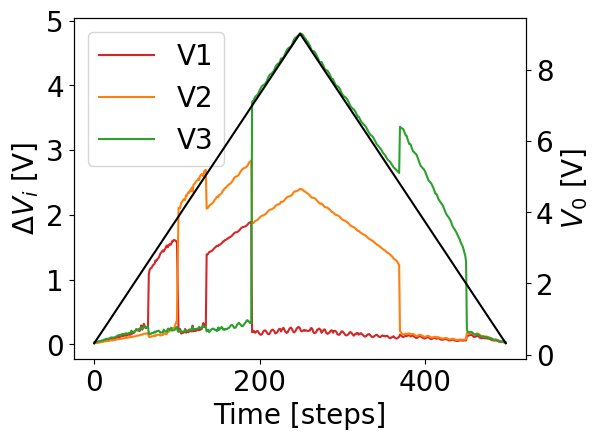

In [33]:
df = pd.read_csv('data/avalanches/avalanche_ud_alt.csv')

fig, ax = plt.subplots()
for i in range(1,4):
    ax.plot(df['V{}'.format(i)], color=colors[i], label = 'V{}'.format(i))

ax2 = ax.twinx()
ax2.plot(df['V0']*3, color=colors[0])
    
ax.set_xlabel('Time [steps]')
ax.set_ylabel(r'$\Delta V_i$ [V]')
ax2.set_ylabel('$V_0$ [V]')
ax.legend()
fig.tight_layout()
fig.savefig('figures/avalanche_du.png')

     Unnamed: 0        V1        V2        V3        Vr        V0       R0  \
191         191  0.187988  1.867828  3.748169  1.572266  2.333374  10000.0   

     V0gain      RL1      RL2      RL3  Vg1  Vg2  Vg3  
191     3.0  10000.0  15000.0  30000.0  2.3  2.3  2.5  
     Unnamed: 0        V1       V2        V3        Vr        V0       R0  \
101         101  0.932159  1.19278  0.206451  1.517029  1.283264  10000.0   

     V0gain      RL1      RL2      RL3  Vg1  Vg2  Vg3  
101     3.0  10000.0  15000.0  30000.0  2.3  2.3  2.5  


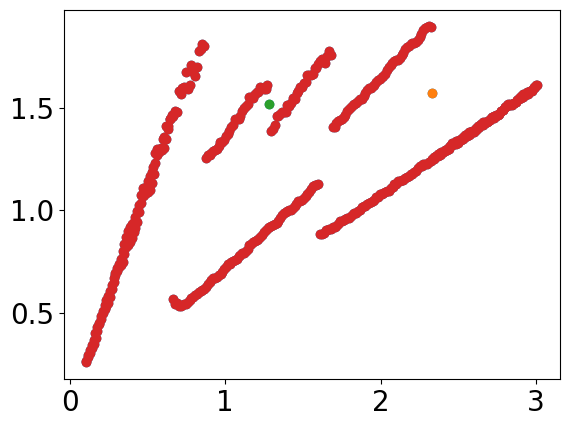

In [42]:
df

plt.scatter(df.V0, df.Vr)
bad = df[df.Vr > 1.5]

bad2 = bad[bad.V0 > 1.2]
bad2 = bad2[bad2.V0 < 1.3]
bad2 = bad2[bad2.Vr < 1.55]

bad = bad[bad.V0 > 2]
bad = bad[bad.V0 < 2.5]
bad = bad[bad.Vr < 1.6]
plt.scatter(bad.V0, bad.Vr)
plt.scatter(bad2.V0, bad2.Vr)


print(bad)
print(bad2)
# print(df.iloc[191])

df = df.drop([191, 101])
plt.scatter(df.V0, df.Vr)

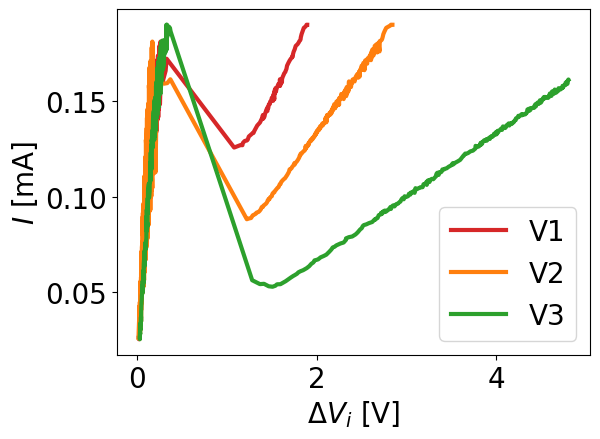

In [46]:
fig, ax = plt.subplots()
for i in range(1,4):
    df = df.sort_values(by=['V{}'.format(i)])
    
    
    dV = df['V{}'.format(i)] 
    I = df.Vr/df.R0*1e3 
    color=colors[i] 
    label = 'V{}'.format(i)

    
    plt.plot(dV, I, color=color, label=label, linewidth=3)
#     ax.scatter(df['V{}'.format(i)], df.Vr/df.R0*1e3, color=colors[i], label = 'V{}'.format(i))
    
ax.set_xlabel(r'$\Delta V_i$ [V]')
ax.set_ylabel(r'$I$ [mA]')
ax.legend()
fig.tight_layout()
fig.savefig('figures/avalanche_UD_IVcurves01.png')

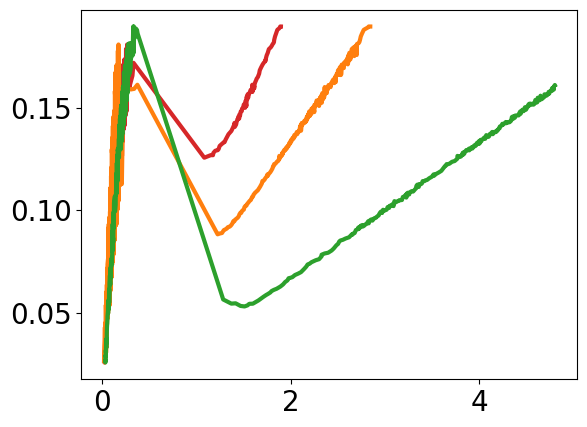

In [48]:
fig, ax = plt.subplots()
for i in range(1,4):
    df = df.sort_values(by=['V{}'.format(i)])
    
    dV = df['V{}'.format(i)] 
    I = df.Vr/df.R0*1e3 
    color=colors[i] 
    label = 'V{}'.format(i)

    
    plt.plot(dV, I, color=color, label=label, linewidth=3)
#     ax.scatter(df['V{}'.format(i)], df.Vr/df.R0*1e3, color=colors[i], label = 'V{}'.format(i))
  
df = df.sort_values(by=['V0'])

    x = np.array(V00)
    y1 = np.array((v-x)/(R0*2))*1e3
    y2 = np.array(Ihat)*1e3
    ax1.plot(V00, y2, c='k', linewidth=2)
#     ax1.plot(V00, I00*1e3, alpha=0.3)
    idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
    ax1.plot(x,y1, color='gray', linestyle='dashed')
    ax1.scatter([v], [0], c='gray')
    ax1.annotate(r'$\Delta V_T$', (v, 1e-2))
    ax1.scatter([0], [v/(R0*2)*1e3], c='gray')
    
# ax.set_xlabel(r'$\Delta V_i$ [V]')
# ax.set_ylabel(r'$I$ [mA]')
# ax.legend()
# fig.tight_layout()
# fig.savefig('figures/avalanche_UD_IVcurves01.png')

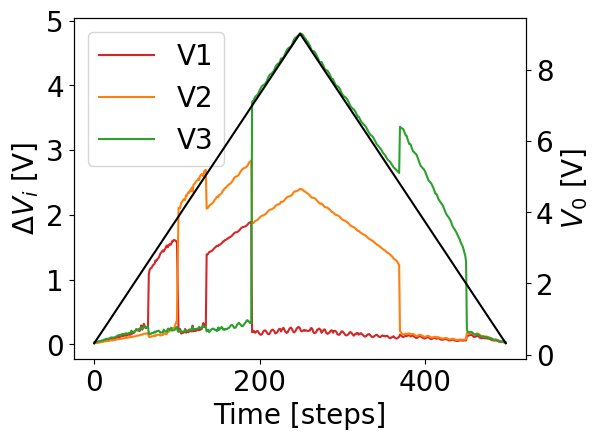

In [6]:
df = pd.read_csv('data/avalanches/avalanche_ud_alt.csv')

fig, ax = plt.subplots()
for i in range(1,4):
    ax.plot(df['V{}'.format(i)], color=colors[i], label = 'V{}'.format(i))

ax2 = ax.twinx()
ax2.plot(df['V0']*3, color=colors[0])
    
ax.set_xlabel('Time [steps]')
ax.set_ylabel(r'$\Delta V_i$ [V]')
ax2.set_ylabel('$V_0$ [V]')
ax.legend()
fig.tight_layout()
fig.savefig('figures/avalanche_ud.png')

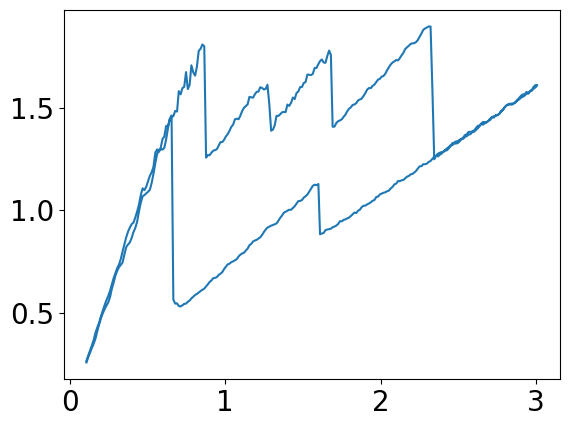

In [7]:
plt.plot(df.V0, df.Vr)

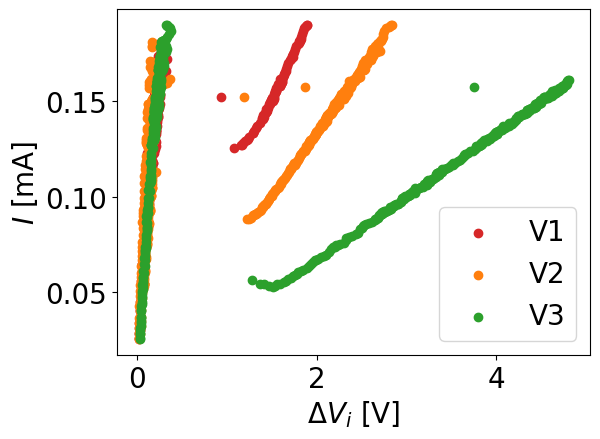

In [8]:
fig, ax = plt.subplots()
for i in range(1,4):
    ax.scatter(df['V{}'.format(i)], df.Vr/df.R0*1e3, color=colors[i], label = 'V{}'.format(i))
    
ax.set_xlabel(r'$\Delta V_i$ [V]')
ax.set_ylabel(r'$I$ [mA]')
ax.legend()
fig.tight_layout()
fig.savefig('figures/avalanche_ud_IVcurves.png')

In [34]:
df

,Unnamed: 0,V1,V2,V3,Vr,V0,R0,V0gain,RL1,RL2,RL3,Vg1,Vg2,Vg3,I
0,0,0.020752,0.017700,0.032349,0.263672,0.106354,10000.0,3.0,10000.0,15000.0,30000.0,2.3,2.3,2.5,0.000026
1,1,0.024567,0.019073,0.034332,0.290680,0.118561,10000.0,3.0,10000.0,15000.0,30000.0,2.3,2.3,2.5,0.000029
2,2,0.028076,0.021667,0.036926,0.316620,0.130615,10000.0,3.0,10000.0,15000.0,30000.0,2.3,2.3,2.5,0.000032
3,3,0.028229,0.022888,0.039825,0.340576,0.142059,10000.0,3.0,10000.0,15000.0,30000.0,2.3,2.3,2.5,0.000034
4,4,0.031128,0.025330,0.043182,0.367737,0.153809,10000.0,3.0,10000.0,15000.0,30000.0,2.3,2.3,2.5,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494,0.039215,0.045776,0.046082,0.348511,0.153656,10000.0,3.0,10000.0,15000.0,30000.0,2.3,2.3,2.5,0.000035
495,495,0.033722,0.040894,0.041656,0.327606,0.141907,10000.0,3.0,10000.0,15000.0,30000.0,2.3,2.3,2.5,0.000033
496,496,0.032196,0.039368,0.038147,0.304260,0.129700,10000.0,3.0,10000.0,15000.0,30000.0,2.3,2.3,2.5,0.000030
497,497,0.028229,0.034180,0.036011,0.282593,0.118408,10000.0,3.0,10000.0,15000.0,30000.0,2.3,2.3,2.5,0.000028


[0.0900257  0.01698167]


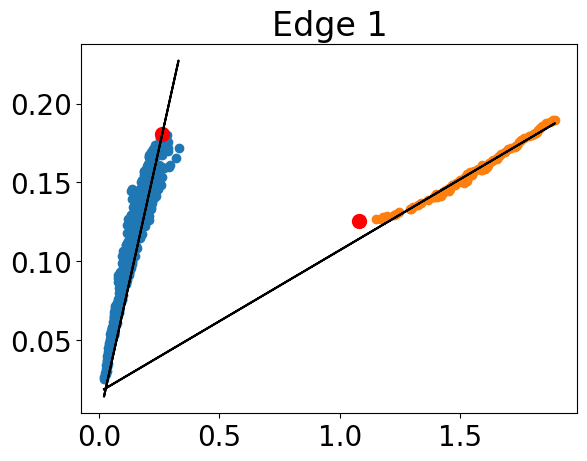

[0.06356114 0.00712814]


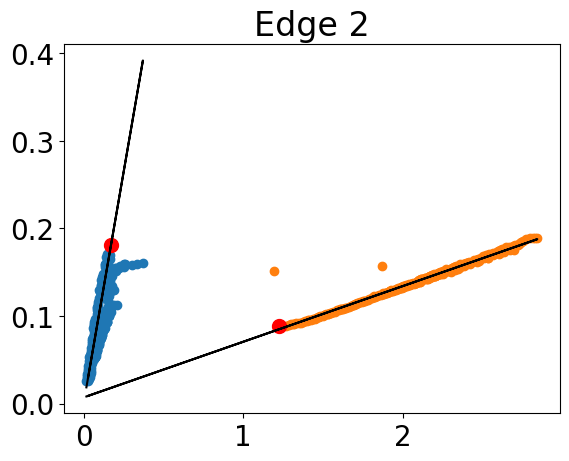

[0.03278386 0.00207116]


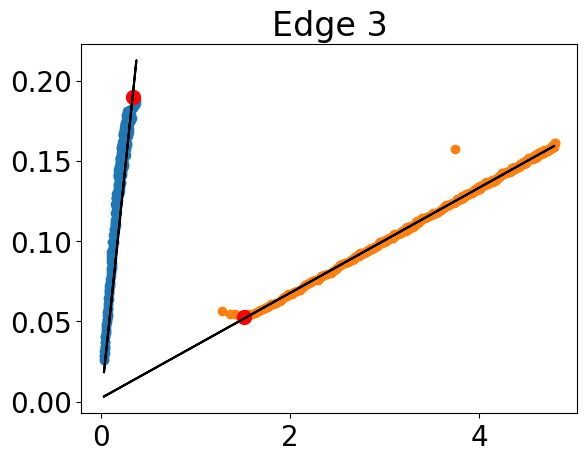

   edgei     fplus    fminus        k0        k1         g
0      1  0.180771  0.125534  0.687979  0.090026  0.016982
1      2  0.180771  0.088165  1.054004  0.063561  0.007128
2      3  0.189560  0.052963  0.567260  0.032784  0.002071


In [63]:
df['I'] = df.Vr/df.R0*1e3

pdf = []
for edgei in range(1,4):
    Vcutofflow = 0.6
    Vcutoffhigh = 1
    off = df[df['V{}'.format(edgei)] < Vcutofflow]
    on = df[df['V{}'.format(edgei)] > Vcutoffhigh]
    
    plt.scatter(off['V{}'.format(edgei)], off.I)
    plt.scatter(on['V{}'.format(edgei)], on.I)

    peakI  = np.max(off.I)
    peakV = off['V{}'.format(edgei)][off.I == peakI].values[0]
    plt.scatter([peakV], [peakI], c='r', s=100)

    valI  = np.min(on.I)
    valV = on['V{}'.format(edgei)][on.I == valI].values[0]
    plt.scatter([valV], [valI], c='r', s=100)

    # z = np.polyfit(off1.V1, off1.I, 1)
    # print(z)
    # p =np.poly1d(z)
    # plt.plot(off1.V1, p(off1.V1), c='k')
    # plt.plot(off1.V1, off1.V1*z[0], c='k')
    k0 = peakI/peakV
    plt.plot(off['V{}'.format(edgei)], off['V{}'.format(edgei)]*k0, c='k')


    z = np.polyfit(on['V{}'.format(edgei)], on.I, 1)
    print(z)
    p =np.poly1d(z)
    plt.plot(df['V{}'.format(edgei)], p(df['V{}'.format(edgei)]), c='k')
    k1 = z[0]
    g = z[1]
    
    plt.title('Edge {}'.format(edgei))
    plt.show()
    
    pvals = {'edgei': edgei, 'fplus': peakI, 'fminus': valI, 'k0': k0, 'k1': k1, 'g': g}
    pdf.append(pvals)

pdf = pd.DataFrame(pdf)
print(pdf)

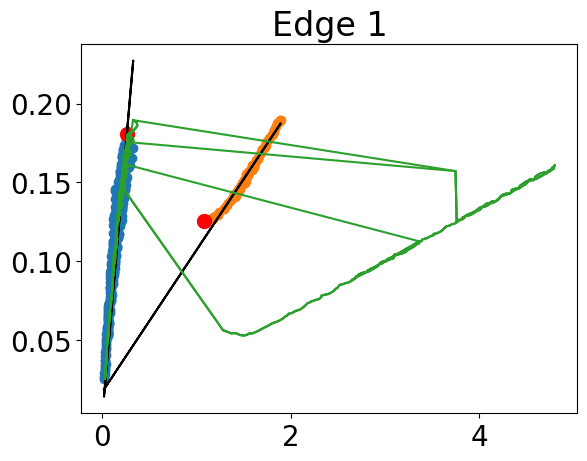

In [59]:
fig

In [39]:
def kapinv(pdf):
    n = len(pdf)
    return (1/n)*np.sum([1/x for x in pdf.k0])
    
def deltaj(pdf, j):
    edgej = pdf[pdf.edgei == j]
    
    numer = (edgej.k1 - edgej.k0).values[0]
    denom = (edgej.k1*edgej.k0).values[0]
    
    return numer/denom

def hiplus(pdf, i):
    edgei = pdf[pdf.edgei == i]
    return (kapinv(pdf)*edgei.fplus).values[0]

def himinus(pdf, i):
    edgei = pdf[pdf.edgei == i]
    n = len(pdf)
    
    term1 = (kapinv(pdf)*edgei.fminus).values[0]
    
    deltai = deltaj(pdf, i)
    
    term2 = ((1/n)*(edgei.g/edgei.k1 - deltai*edgei.fminus)).values[0]
    
    return term1 + term2


def cijplus(pdf, i, j):
    edgei = pdf[pdf.edgei == i]
    edgej = pdf[pdf.edgei == j]
    n = len(pdf)
    
    delta_j = deltaj(pdf, j)
    
    term1 = ((-1*edgej.g)/(n*edgej.k1)).values[0]
    term2 = (delta_j/n*edgei.fplus).values[0]
    
    return term1 + term2
    
    
def cijminus(pdf, i, j):
    edgei = pdf[pdf.edgei == i]
    edgej = pdf[pdf.edgei == j]
    n = len(pdf)
    
    delta_j = deltaj(pdf, j)
    
    term1 = ((-1*edgej.g)/(n*edgej.k1)).values[0]
    term2 = (delta_j/n*edgei.fminus).values[0]
    
    return term1 + term2

# def total_Hiplus(pdf, i):
#     term1 = hiplus(pdf, i)
    
#     n = len(pdf)
#     jlist = np.arange(1, n+1)
#     iindex = np.argwhere(jlist == i)
#     jlist = np.delete(jlist, iindex)
    
    

In [40]:
cplus = np.zeros((3,3))
cminus = np.zeros((3,3))

for i in range(1,4):
    print('h{}+ = {}'.format(i, hiplus(pdf,i)))
    print('h{}- = {}'.format(i, himinus(pdf,i)))
    for j in range(1,4):
        if i != j:
            print('c{}{}+ = {}'.format(i, j, cijplus(pdf,i,j)))
            cplus[j-1, i-1] = cijplus(pdf,i,j)
            print('c{}{}- = {}'.format(i, j, cijminus(pdf,i,j)))
            
            cminus[j-1, i-1] = cijminus(pdf,i,j)

h1+ = 0.25097957912931157
h1- = 0.6411523684666603
c12+ = -0.9282280912457586
c12- = -0.6560188645758268
c13+ = -1.7528409520991524
c13- = -1.2236730992959837
h2+ = 0.25097957912931157
h2- = 0.594271420225432
c21+ = -0.6446223269286065
c21- = -0.3466049747851069
c23+ = -1.7528409520991524
c23- = -0.8656808143470996
h3+ = 0.2631821821155936
h3- = 0.6019793364458532
c31+ = -0.6729067221888893
c31- = -0.2333200791853287
c32+ = -0.9715409405722449
c32- = -0.29838707395643593


In [41]:
hplus = [hiplus(pdf, i) for i in np.arange(1,4)]
hminus = [himinus(pdf, i) for i in np.arange(1,4)]
pdf['hplus'] = hplus
pdf['hminus'] = hminus

pdf

,edgei,fplus,fminus,k0,k1,g,hplus,hminus
0,1,0.180771,0.125534,0.687979,0.090026,0.016982,0.250980,0.641152
1,2,0.180771,0.088165,1.054004,0.063561,0.007128,0.250980,0.594271
2,3,0.189560,0.052963,0.567260,0.032784,0.002071,0.263182,0.601979


In [42]:
np.get_printoptions()
np.set_printoptions(linewidth=120)
print(cplus)
print(cminus)

[[ 0.         -0.64462233 -0.67290672]
 [-0.92822809  0.         -0.97154094]
 [-1.75284095 -1.75284095  0.        ]]
[[ 0.         -0.34660497 -0.23332008]
 [-0.65601886  0.         -0.29838707]
 [-1.2236731  -0.86568081  0.        ]]


In [45]:
states = [[0,0,0],
          [0,0,1],
          [1,0,0],
          [0,1,0],
          [0,1,1],
          [1,1,0],
          [1,0,1],
          [1,1,1]]

states=np.array(states)

In [57]:
print(pdf)
print('')
for s in states:
#     Hplustot = np.array(pdf.fplus) 
    Hplustot = np.array(hplus)# - np.dot(cplus, s.T)
    Hminustot = np.array(hminus)# -np.dot(cminus, s.T)
    #+ np.dot(cminus, s.T)
    print('s', s)
    soff = np.argwhere(s==0).flatten()
#     print('soff', soff)
    Hplustot_off = Hplustot[soff]
#     print(Hplustot, Hplustot_off)
    try:
        print('Next up: ', soff[np.argwhere(Hplustot_off==np.min(Hplustot_off))])
        newstate = s.copy()
        newstate[soff[np.argwhere(Hplustot_off==np.min(Hplustot_off))]] += 1
        print('Next state up: ', newstate)
    except:
        pass
    
    son = np.argwhere(s==1).flatten()
#     print('soff', soff)
    Hminustot_on = Hminustot[son]
#     print(Hplustot, Hplustot_off)
    try:
        print('Next down: ', son[np.argwhere(Hminustot_on==np.max(Hminustot_on))])
        newstate = s.copy()
        newstate[son[np.argwhere(Hminustot_on==np.max(Hminustot_on))]] -= 1
        print('Next state down: ', newstate)
    except:
        pass
    print('')

   edgei     fplus    fminus        k0        k1         g     hplus    hminus
0      1  0.180771  0.125534  0.687979  0.090026  0.016982  0.250980  0.641152
1      2  0.180771  0.088165  1.054004  0.063561  0.007128  0.250980  0.594271
2      3  0.189560  0.052963  0.567260  0.032784  0.002071  0.263182  0.601979

s [0 0 0]
Next up:  [[0]
 [1]]
Next state up:  [1 1 0]

s [0 0 1]
Next up:  [[0]
 [1]]
Next state up:  [1 1 1]
Next down:  [[2]]
Next state down:  [0 0 0]

s [1 0 0]
Next up:  [[1]]
Next state up:  [1 1 0]
Next down:  [[0]]
Next state down:  [0 0 0]

s [0 1 0]
Next up:  [[0]]
Next state up:  [1 1 0]
Next down:  [[1]]
Next state down:  [0 0 0]

s [0 1 1]
Next up:  [[0]]
Next state up:  [1 1 1]
Next down:  [[2]]
Next state down:  [0 1 0]

s [1 1 0]
Next up:  [[2]]
Next state up:  [1 1 1]
Next down:  [[0]]
Next state down:  [0 1 0]

s [1 0 1]
Next up:  [[1]]
Next state up:  [1 1 1]
Next down:  [[0]]
Next state down:  [0 0 1]

s [1 1 1]
Next down:  [[0]]
Next state down:  [0 1 1

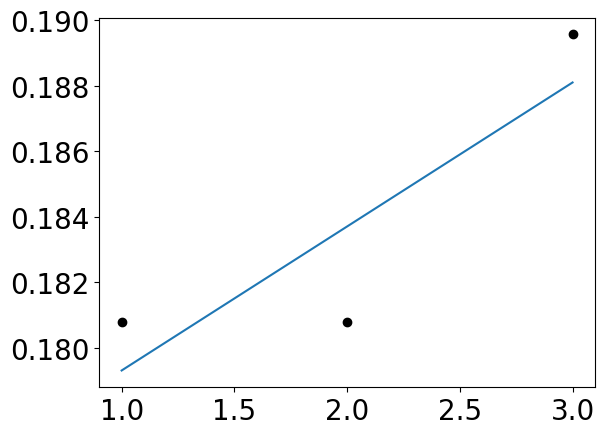

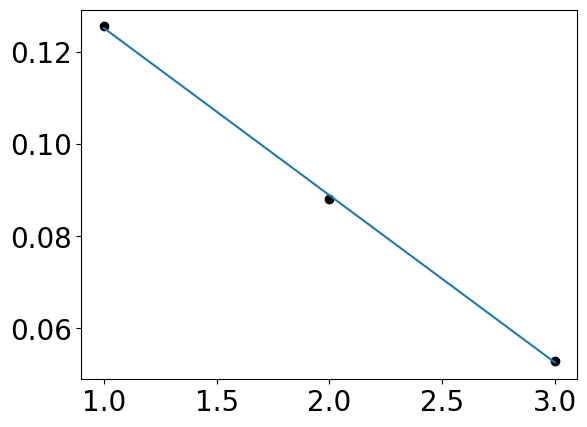

   edgei     fplus    fminus        k0        k1         g     hplus    hminus
0      1  0.180771  0.125534  0.687979  0.090026  0.016982  0.250980  0.641152
1      2  0.180771  0.088165  1.054004  0.063561  0.007128  0.250980  0.594271
2      3  0.189560  0.052963  0.567260  0.032784  0.002071  0.263182  0.601979
   edgei     fplus    fminus        k0        k1         g     hplus    hminus
0      1  0.179306  0.125173  0.687979  0.090026  0.016982  0.248946  0.639489
1      2  0.183701  0.088888  1.054004  0.063561  0.007128  0.255047  0.598833
2      3  0.188095  0.052602  0.567260  0.032784  0.002071  0.261148  0.598018


In [44]:
pdf2 = pdf.copy()

plt.scatter(pdf.edgei, pdf.fplus, c='k')
zplus = np.polyfit(pdf.edgei, pdf.fplus, 1)
pplus = np.poly1d(zplus)
plt.plot(pdf.edgei, pplus(pdf.edgei))
plt.show()

pdf2['fplus'] = pplus(pdf.edgei)

plt.scatter(pdf.edgei, pdf.fminus, c='k')
zminus = np.polyfit(pdf.edgei, pdf.fminus, 1)
pminus = np.poly1d(zminus)
plt.plot(pdf.edgei, pminus(pdf.edgei))
plt.show()

pdf2['fminus'] = pminus(pdf.edgei)

hplus2 = [hiplus(pdf2, i) for i in np.arange(1,4)]
hminus2 = [himinus(pdf2, i) for i in np.arange(1,4)]
pdf2['hplus'] = hplus2
pdf2['hminus'] = hminus2

print(pdf)
print(pdf2)

In [166]:
cplus2 = np.zeros((9,9))
cminus2 = np.zeros((9,9))

for i in range(1,10):
    print('h{}+ = {}'.format(i, hiplus(pdf2,i)))
    print('h{}- = {}'.format(i, himinus(pdf2,i)))
    for j in range(1,10):
        if i != j:
            print('c{}{}+ = {}'.format(i, j, cijplus(pdf2,i,j)))
            cplus2[j-1, i-1] = cijplus(pdf2,i,j)
            print('c{}{}- = {}'.format(i, j, cijminus(pdf2,i,j)))
            
            cminus2[j-1, i-1] = cijminus(pdf2,i,j)

h1+ = 0.2937446962127268
h1- = 0.32125541815366493
c12+ = -0.22525891690062042
c12- = -0.1419643664067118
c13+ = -0.2290578978659085
c13- = -0.1408005376649564
c14+ = -0.2343629392869998
c14- = -0.14229997190940377
c15+ = -0.2421144291973896
c15- = -0.1473168413222866
c16+ = -0.26067972023314046
c16- = -0.1586134192138364
c17+ = -0.27235094892529416
c17- = -0.16546817723369128
c18+ = -0.28869320610123184
c18- = -0.17548392459755596
c19+ = -0.29281853565781896
c19- = -0.1765902243676299
h2+ = 0.30452525292230065
h2- = 0.3162226893948222
c21+ = -0.22181364116588456
c21- = -0.13100826400463805
c23+ = -0.23785625821802062
c23- = -0.13556998985599727
c24+ = -0.24354067993354245
c24- = -0.13684388585372811
c25+ = -0.2515647836690971
c25- = -0.14169868874639094
c26+ = -0.2708546914098254
c26- = -0.1525644883830305
c27+ = -0.283006073196336
c27- = -0.15913379961335364
c28+ = -0.2999790189966678
c28- = -0.16877460813970319
c29+ = -0.30440531508924723
c29- = -0.1697019859524574
h3+ = 0.315305809

In [168]:
for s in states:
#     Hplustot = np.array(pdf.fplus) 
    Hplustot = np.array(hplus2)# - np.dot(cplus2, s.T)
    Hminustot = np.array(hminus2)# -np.dot(cminus2, s.T)
    #+ np.dot(cminus, s.T)
    print('s', s)
    soff = np.argwhere(s==0).flatten()
#     print('soff', soff)
    Hplustot_off = Hplustot[soff]
#     print(Hplustot, Hplustot_off)
    try:
        print('Next up: ', soff[np.argwhere(Hplustot_off==np.min(Hplustot_off))]+1)
    except:
        pass
    
    son = np.argwhere(s==1).flatten()
#     print('soff', soff)
    Hminustot_on = Hminustot[son]
#     print(Hplustot, Hplustot_off)
    try:
        print('Next down: ', son[np.argwhere(Hminustot_on==np.max(Hminustot_on))]+1)
    except:
        pass
    
#     plt.plot(soff, Hplustot_off)
#     plt.show()
#     np.argwhere(Hminustot==np.max(Hminustot))+1)
#     plt.plot(pdf.edgei, hplus + np.dot(cplus, s.T))
#     plt.scatter(pdf.edgei, pdf.fplus, c='k')

s [0 0 0 0 0 0 0 0 0]
Next up:  [[1]]
s [1 0 0 0 0 0 0 0 0]
Next up:  [[2]]
Next down:  [[1]]
s [1 1 0 0 0 0 0 0 0]
Next up:  [[3]]
Next down:  [[1]]
s [1 1 1 0 0 0 0 0 0]
Next up:  [[4]]
Next down:  [[1]]
s [1 1 1 1 0 0 0 0 0]
Next up:  [[5]]
Next down:  [[1]]
s [1 1 1 1 1 0 0 0 0]
Next up:  [[6]]
Next down:  [[1]]
s [1 1 1 1 1 1 0 0 0]
Next up:  [[7]]
Next down:  [[1]]
s [1 1 1 1 1 1 1 0 0]
Next up:  [[8]]
Next down:  [[1]]
s [1 1 1 1 1 1 1 1 0]
Next up:  [[9]]
Next down:  [[1]]
s [1 1 1 1 1 1 1 1 1]
Next down:  [[1]]
s [0 1 1 1 1 1 1 1 1]
Next up:  [[1]]
Next down:  [[2]]
s [0 0 1 1 1 1 1 1 1]
Next up:  [[1]]
Next down:  [[3]]
s [0 0 0 1 1 1 1 1 1]
Next up:  [[1]]
Next down:  [[4]]
s [0 0 0 0 1 1 1 1 1]
Next up:  [[1]]
Next down:  [[5]]
s [0 0 0 0 0 1 1 1 1]
Next up:  [[1]]
Next down:  [[6]]
s [0 0 0 0 0 0 1 1 1]
Next up:  [[1]]
Next down:  [[7]]
s [0 0 0 0 0 0 0 1 1]
Next up:  [[1]]
Next down:  [[8]]
s [0 0 0 0 0 0 0 0 1]
Next up:  [[1]]
Next down:  [[9]]
s [1 0 0 0 0 0 0 0 1]
Next

In [169]:
pdf2

,edgei,fplus,fminus,k0,k1,g,hplus,hminus
0,1,0.221581,0.140007,0.649651,0.098196,0.001040,0.293745,0.321255
1,2,0.229713,0.135172,0.721950,0.094563,-0.000847,0.304525,0.316223
2,3,0.237845,0.130338,0.729368,0.090022,-0.008650,0.315306,0.303125
3,4,0.245977,0.125503,0.713150,0.086509,-0.012231,0.326086,0.292309
4,5,0.254109,0.120669,0.778825,0.085158,-0.011792,0.336867,0.284812
5,6,0.262241,0.115834,0.776913,0.079694,-0.011881,0.347647,0.281928
6,7,0.270373,0.111000,0.823265,0.076882,-0.012438,0.358428,0.274612
7,8,0.278505,0.106165,0.808169,0.072846,-0.012338,0.369209,0.269260
8,9,0.286638,0.101331,0.826290,0.071258,-0.014682,0.379989,0.255816


In [172]:
(cplus - cminus)

array([[ 0.        , -0.09071773, -0.1011162 , -0.11438322, -0.13518017, -0.14808862, -0.15812853, -0.16099707,
        -0.17103698],
       [-0.07852542,  0.        , -0.10749597, -0.12160005, -0.14370915, -0.15743204, -0.1681054 , -0.17115493,
        -0.18182828],
       [-0.08320408, -0.10218754,  0.        , -0.12884515, -0.15227155, -0.16681207, -0.17812136, -0.18135258,
        -0.19266188],
       [-0.08679179, -0.1065938 , -0.11881207,  0.        , -0.15883741, -0.17400491, -0.18580185, -0.1891724 ,
        -0.20096935],
       [-0.08936984, -0.10976005, -0.12234124, -0.1383931 ,  0.        , -0.17917351, -0.19132087, -0.19479155,
        -0.2069389 ],
       [-0.09622237, -0.11817602, -0.13172189, -0.14900455, -0.17609629,  0.        , -0.20599062, -0.20972741,
        -0.22280618],
       [-0.10076307, -0.12375271, -0.1379378 , -0.15603602, -0.18440621, -0.20201529,  0.        , -0.21962437,
        -0.23332032],
       [-0.10672735, -0.13107777, -0.14610249, -0.16527197, -0

Text(0, 0.5, '$H^-_i(S)$')

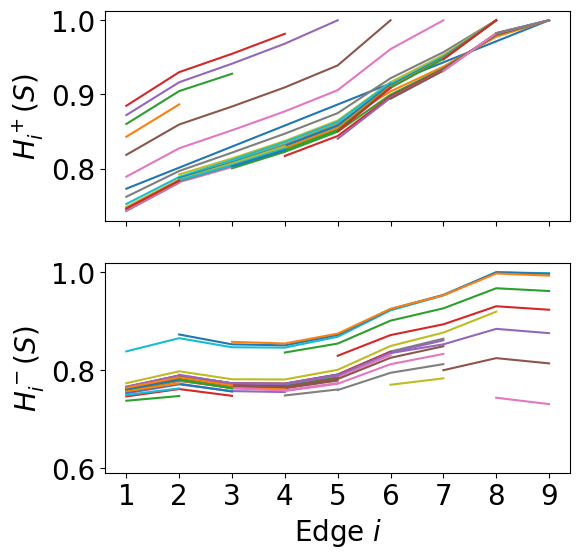

In [194]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(6,6))

for s in states:
    Hplustot = np.array(hplus2) - np.dot(cplus2, s.T)
    Hminustot = np.array(hminus2) -np.dot(cminus2, s.T)
    
    Hplustot /= np.max(Hplustot)
    Hminustot /= np.max(Hminustot)
    
    Hplustot[s==1] = None
    ax1.plot(pdf2.edgei, Hplustot)
    
    Hminustot[s==0] = None
    ax2.plot(pdf2.edgei, Hminustot)
    
    
ax2.set_xticks(np.arange(1,10))

ax2.set_xlabel(r'Edge $i$')
ax1.set_ylabel(r'$H^+_i(S)$')
ax2.set_ylabel(r'$H^-_i(S)$')